In [17]:
!pip install pillow

In [18]:
!pip install opencv-python

In [19]:
!pip install pytesseract

In [20]:
!pip install matplotlib

In [21]:
# !pip install pdftotext
!pip install spacy
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "C:\Users\edominer\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 187, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "C:\Users\edominer\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 146, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "C:\Users\edominer\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 110, in _get_module_details
    __import__(pkg_name)
  File "c:\Users\edominer\Python Project\.venv\lib\site-packages\spacy\__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "c:\Users\edominer\Python Project\.venv\lib\site-packages\spacy\errors.py", line 3, in <module>
    from .compat import Literal
  File "c:\Users\edominer\Python Project\.venv\lib\site-packages\spacy\compat.py", line 39, in <module>
    from thinc.api import Optimizer  # noqa: F401
  File "c:\Users\edominer\Python Pr

In [22]:
!pip install pandas

In [23]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
from PIL import Image
import numpy as np
import cv2
from pytesseract import Output
# from matplotlib import pyplot as plt

In [24]:
# import spacy
# # Load the English pre-trained model with NER
# nlp = spacy.load('en_core_web_sm')

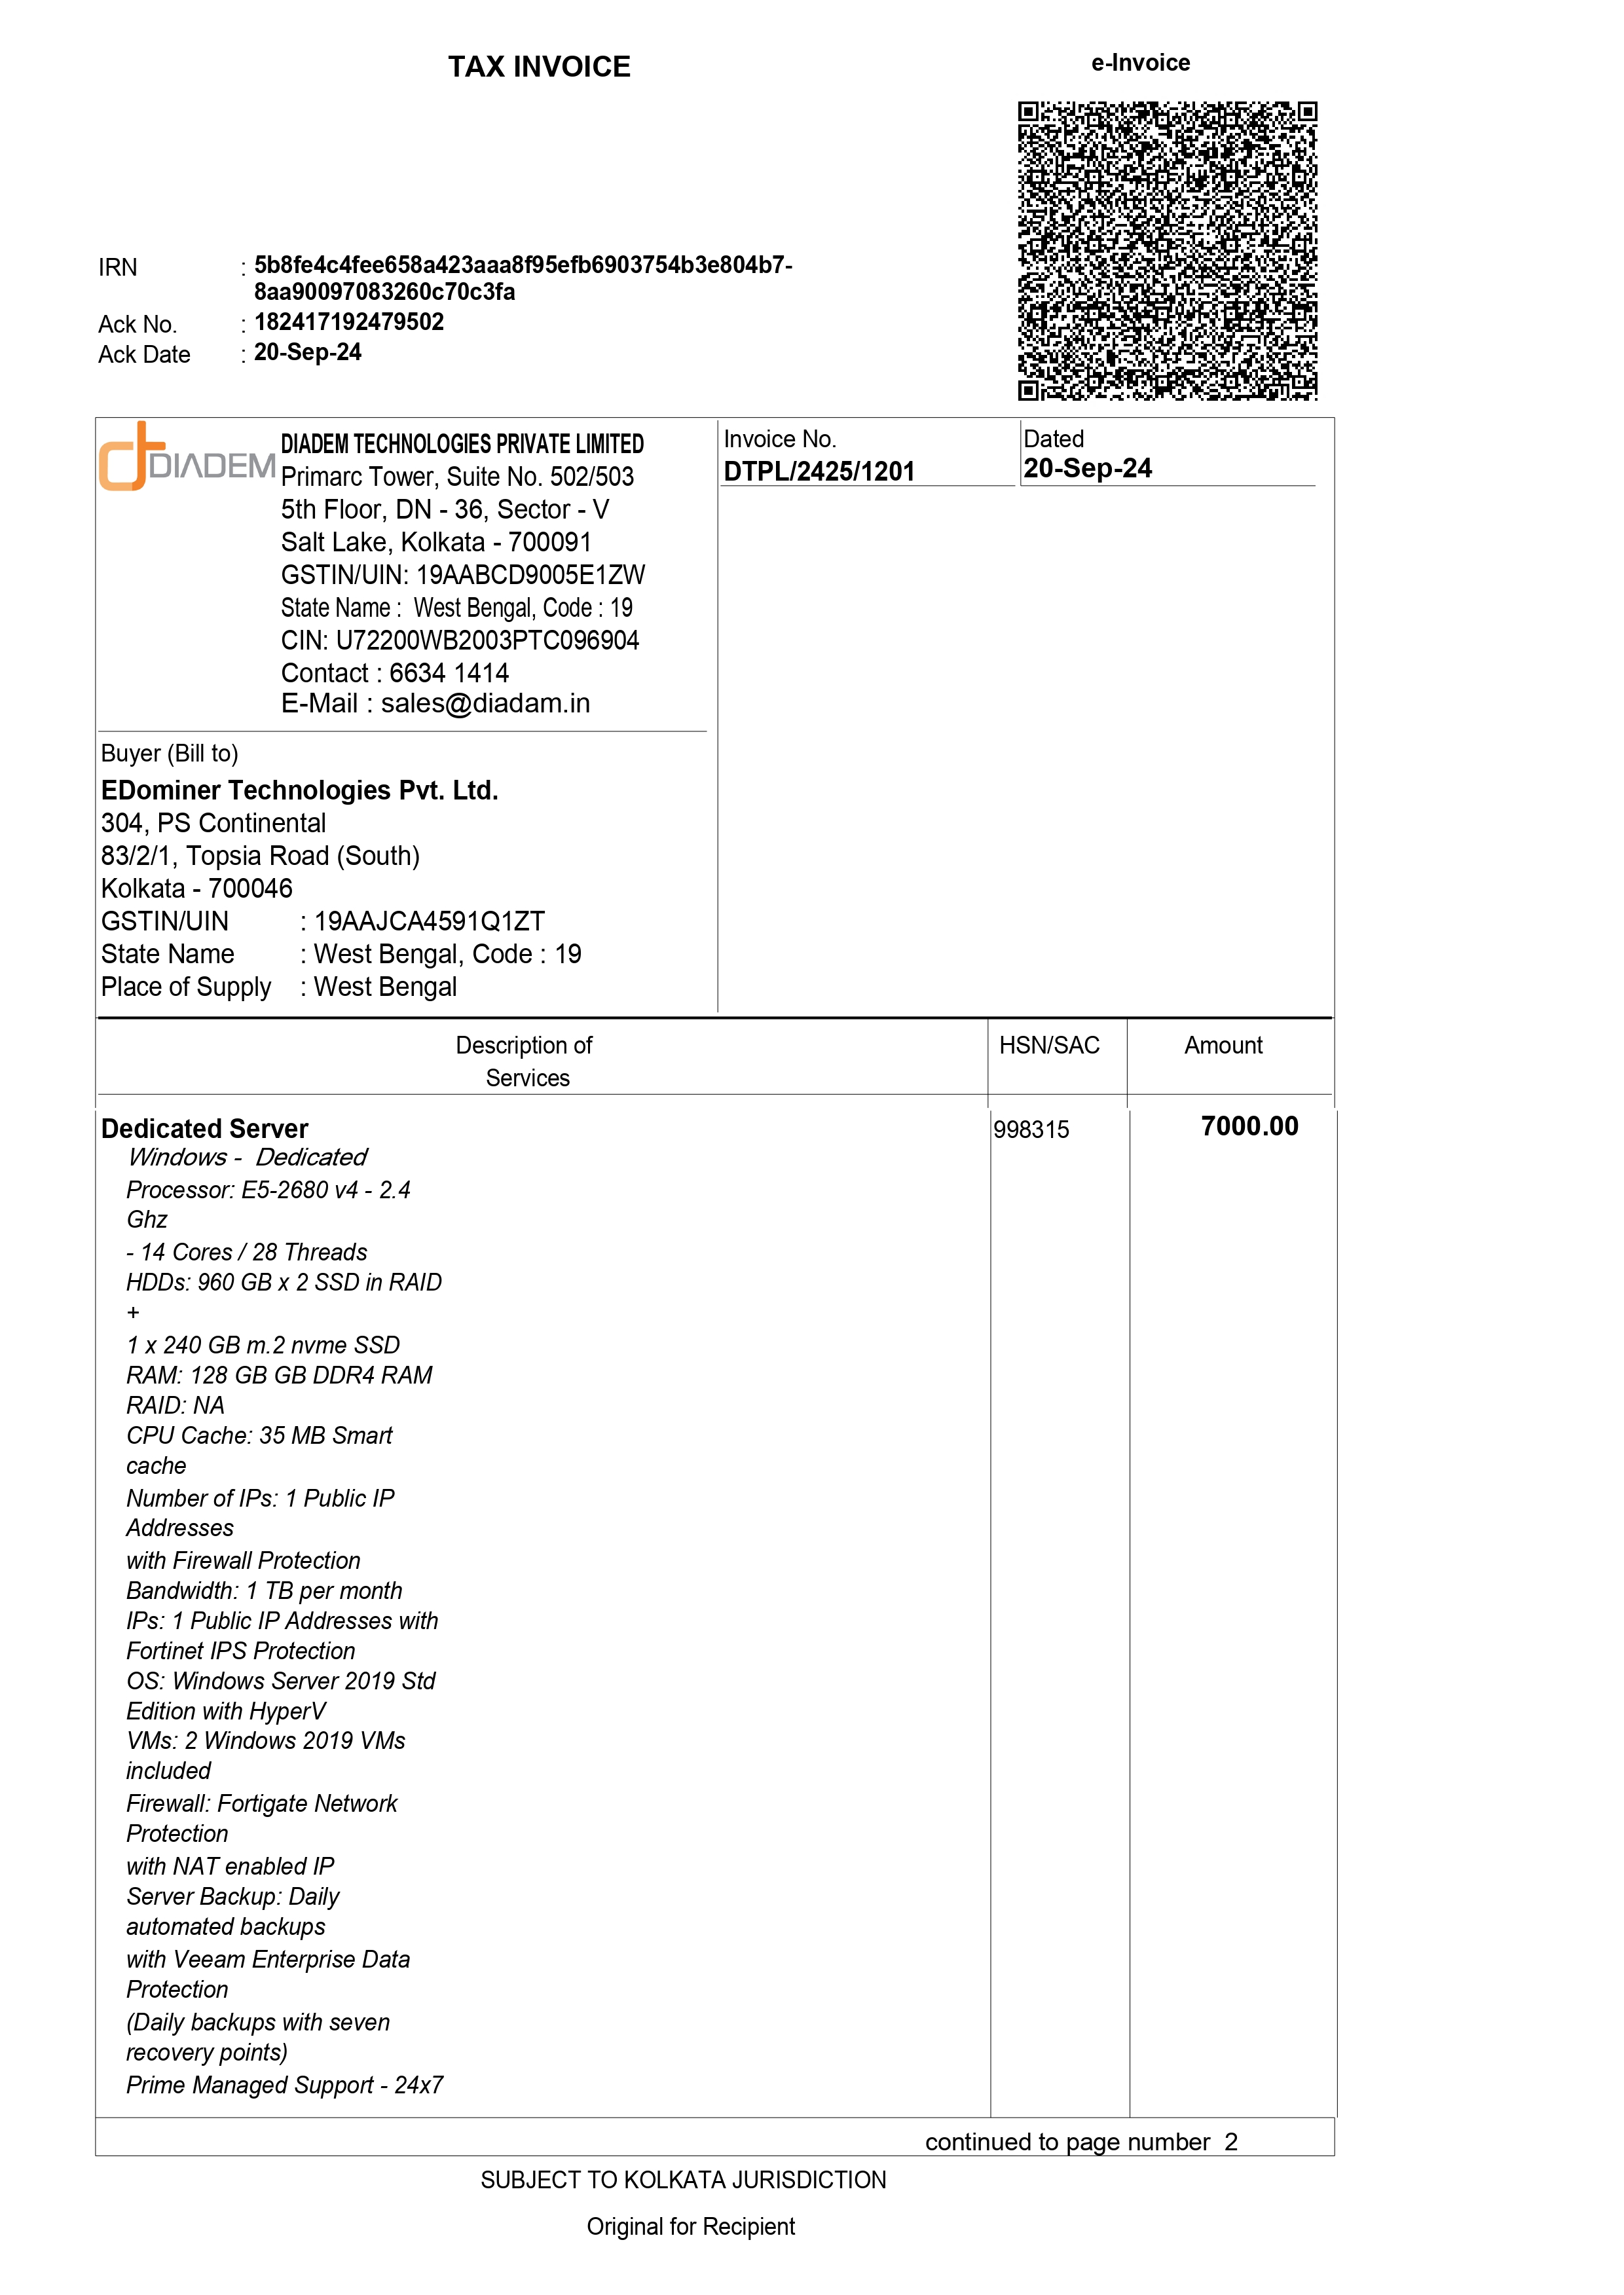

In [25]:
img_path = "Edominer-1201_page-1.jpg"
image = cv2.imread(img_path)

display_img = Image.open(img_path)
display_img

In [26]:
# def display(im_path):
#     dpi = 80
#     im_data = plt.imread(im_path)
#     height, width, depth = im_data.shape

#     #What size does the figure need to be in inches to fit the image
#     figsize = width / float(dpi) , height / float(dpi)

#     #Create a figure of right size with one axes that takes up the full figure
#     fig = plt.figure(figsize = figsize)
#     ax = fig.add_axes([0,0,1,1])

#     #Hide spines, ticks etc.
#     ax.axis('off')

#     #Display the Image
#     ax.imshow(im_data, cmap = 'gray')
#     plt.show()

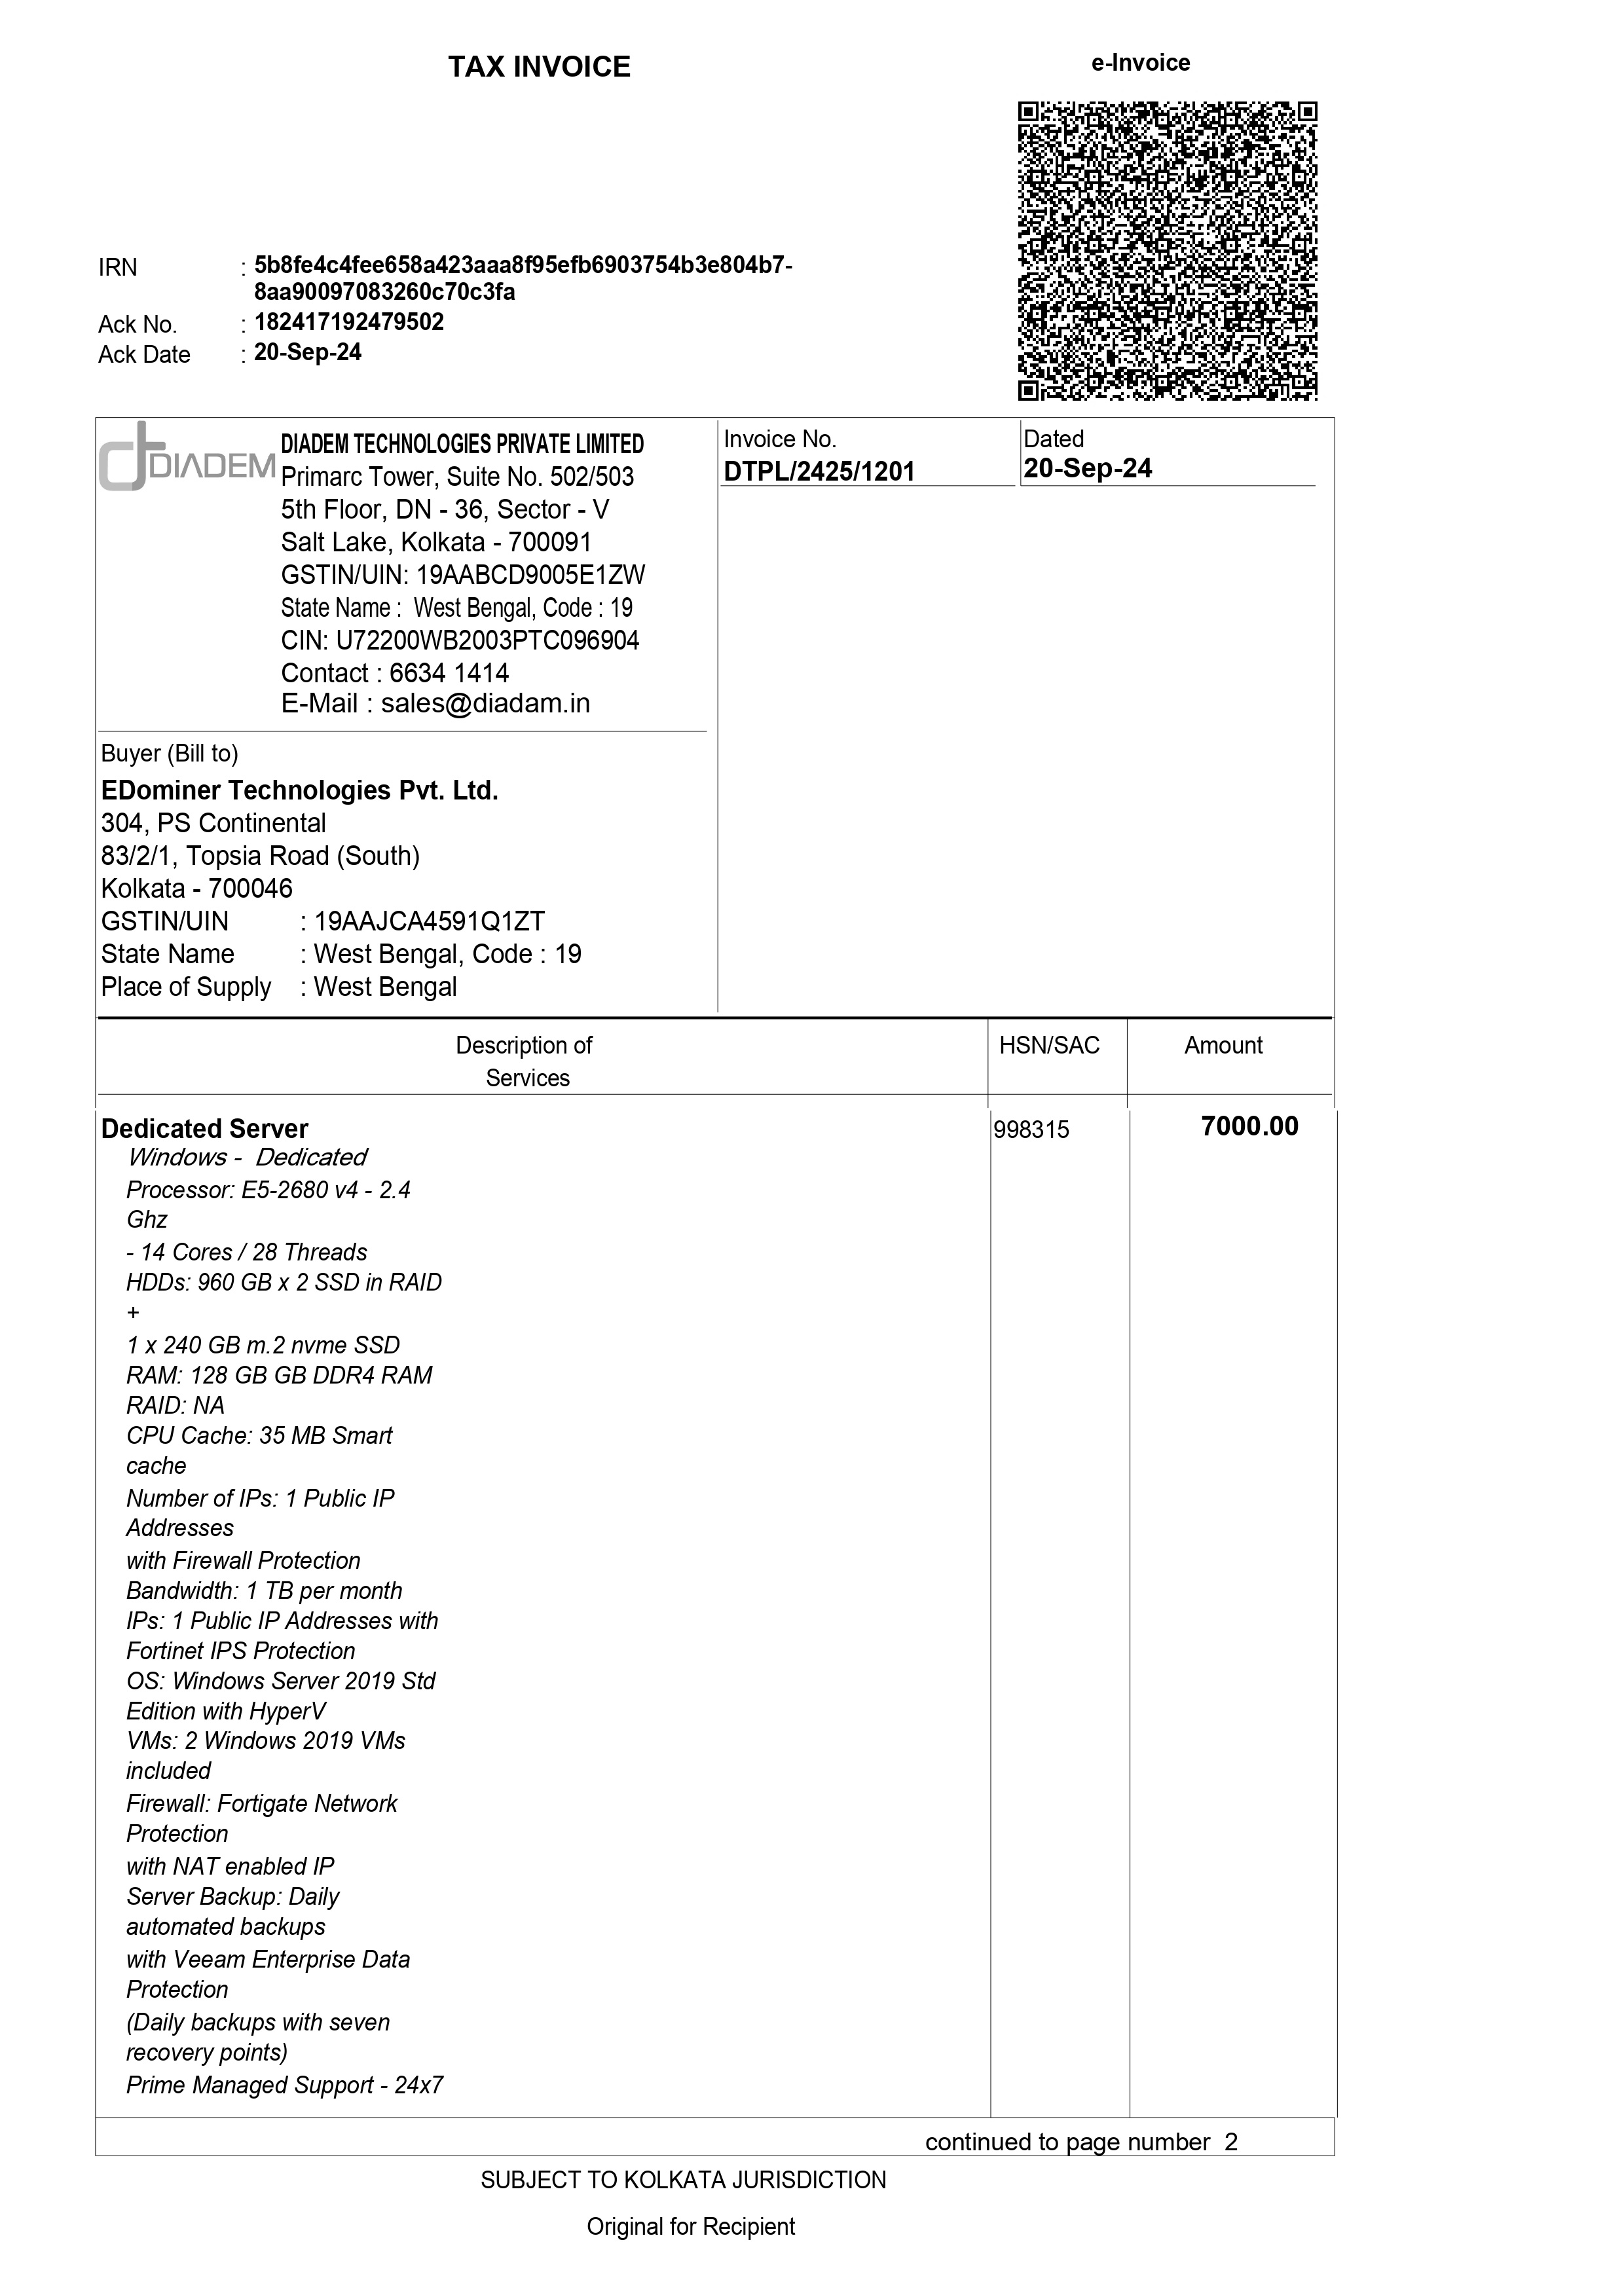

In [27]:
# Converting image to GrayScale
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_Edominer-1201_page-1.jpg",gray_img)
display_img = Image.open("gray_Edominer-1201_page-1.jpg")
display_img

In [28]:
text = pytesseract.image_to_string(gray_img)
text

'TAX INVOICE\n\ne-Invoice\n\nIRN : 5b8fe4c4fee658a423aaa8t95efb6903754b3e804b7-\n8aa90097083260c70c3fa\nAck No. - 182417192479502\nAck Date : 20-Sep-24\nDIADEM TECHNOLOGIES PRIVATE LIMITED Invoice No. Dated\nPrimarc Tower, Suite No. 502/503 DTPL/2425/1201 20-Sep-24\n5th Floor, DN - 36, Sector - V\nSalt Lake, Kolkata - 700091\nGSTIN/UIN: 19AABCD9005E1ZW\nState Name : West Bengal, Code : 19\nCIN: U72200WB2003PTC096904\nContact : 6634 1414\nE-Mail : sales@diadam.in\nBuyer (Bill to)\nEDominer Technologies Pvt. Ltd.\n304, PS Continental\n83/2/1, Topsia Road (South)\nKolkata - 700046\nGSTIN/UIN : 19AAJCA4591Q1ZT\nState Name : West Bengal, Code : 19\nPlace of Supply : West Bengal\nDescription of HSN/SAC Amount\nServices\nI I\nDedicated Server 998315 7000.00\n\nWindows - Dedicated\nProcessor: E5-2680 v4 - 2.4\nGhz\n\n- 14 Cores / 28 Threads\nHDDs: 960 GB x 2 SSD in RAID\n+\n\n1 x 240 GBm.2 nvme SSD\nRAM: 128 GB GB DDR4 RAM\nRAID: NA\n\nCPU Cache: 35 MB Smart\ncache\n\nNumber of IPs: 1 Public I

In [29]:
d = pytesseract.image_to_data(gray_img, output_type=Output.DICT)
# Print the keys of the resulting dictionary to see the available information
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [30]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 60:  # Check if confidence score is greater than 60
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(gray_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', gray_img)
cv2.waitKey(0)

-1

In [31]:
w=""
for char in text:
    if char!='\n':
        w = w + char
    else:
        print(w)
        w=""

TAX INVOICE

e-Invoice

IRN : 5b8fe4c4fee658a423aaa8t95efb6903754b3e804b7-
8aa90097083260c70c3fa
Ack No. - 182417192479502
Ack Date : 20-Sep-24
DIADEM TECHNOLOGIES PRIVATE LIMITED Invoice No. Dated
Primarc Tower, Suite No. 502/503 DTPL/2425/1201 20-Sep-24
5th Floor, DN - 36, Sector - V
Salt Lake, Kolkata - 700091
GSTIN/UIN: 19AABCD9005E1ZW
State Name : West Bengal, Code : 19
CIN: U72200WB2003PTC096904
Contact : 6634 1414
E-Mail : sales@diadam.in
Buyer (Bill to)
EDominer Technologies Pvt. Ltd.
304, PS Continental
83/2/1, Topsia Road (South)
Kolkata - 700046
GSTIN/UIN : 19AAJCA4591Q1ZT
State Name : West Bengal, Code : 19
Place of Supply : West Bengal
Description of HSN/SAC Amount
Services
I I
Dedicated Server 998315 7000.00

Windows - Dedicated
Processor: E5-2680 v4 - 2.4
Ghz

- 14 Cores / 28 Threads
HDDs: 960 GB x 2 SSD in RAID
+

1 x 240 GBm.2 nvme SSD
RAM: 128 GB GB DDR4 RAM
RAID: NA

CPU Cache: 35 MB Smart
cache

Number of IPs: 1 Public IP
Addresses

with Firewall Protection
Bandwidt

In [32]:
data = pytesseract.image_to_data(gray_img)
data

'level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext\n1\t1\t0\t0\t0\t0\t0\t0\t2480\t3505\t-1\t\n2\t1\t1\t0\t0\t0\t684\t84\t277\t35\t-1\t\n3\t1\t1\t1\t0\t0\t684\t84\t277\t35\t-1\t\n4\t1\t1\t1\t1\t0\t684\t84\t277\t35\t-1\t\n5\t1\t1\t1\t1\t1\t684\t84\t89\t35\t51.612793\tTAX)\n5\t1\t1\t1\t1\t2\t793\t87\t168\t29\t96.147156\tINVOICE\n2\t1\t2\t0\t0\t0\t145\t375\t1065\t203\t-1\t\n3\t1\t2\t1\t0\t0\t148\t375\t1062\t185\t-1\t\n4\t1\t2\t1\t1\t0\t148\t375\t1062\t60\t-1\t\n5\t1\t2\t1\t1\t1\t148\t375\t65\t60\t85.541122\tIRN\n5\t1\t2\t1\t1\t2\t369\t400\t7\t23\t82.114220\t1\n5\t1\t2\t1\t1\t3\t390\t390\t820\t27\t0.000000\t5b8fedc4fee658a423aaa8i95efb6903754b3e804b7-\n4\t1\t2\t1\t2\t0\t149\t480\t227\t30\t-1\t\n5\t1\t2\t1\t2\t1\t149\t480\t61\t30\t94.222488\tAck\n5\t1\t2\t1\t2\t2\t220\t480\t51\t30\t92.792114\tNo]\n5\t1\t2\t1\t2\t3\t369\t487\t7\t23\t0.000000\tQ\n4\t1\t2\t1\t3\t0\t145\t518\t229\t60\t-1\t\n5\t1\t2\t1\t3\t1\t145\t518\t65\t60\t75.696175\tAck\n2\t1\t3\t0

In [33]:
type(data)

str

In [34]:
w=""
for char in data:
    if char!='\n':
        w = w + char
    else:
        print(w)
        w=""

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	2480	3505	-1	
2	1	1	0	0	0	684	84	277	35	-1	
3	1	1	1	0	0	684	84	277	35	-1	
4	1	1	1	1	0	684	84	277	35	-1	
5	1	1	1	1	1	684	84	89	35	51.612793	TAX)
5	1	1	1	1	2	793	87	168	29	96.147156	INVOICE
2	1	2	0	0	0	145	375	1065	203	-1	
3	1	2	1	0	0	148	375	1062	185	-1	
4	1	2	1	1	0	148	375	1062	60	-1	
5	1	2	1	1	1	148	375	65	60	85.541122	IRN
5	1	2	1	1	2	369	400	7	23	82.114220	1
5	1	2	1	1	3	390	390	820	27	0.000000	5b8fedc4fee658a423aaa8i95efb6903754b3e804b7-
4	1	2	1	2	0	149	480	227	30	-1	
5	1	2	1	2	1	149	480	61	30	94.222488	Ack
5	1	2	1	2	2	220	480	51	30	92.792114	No]
5	1	2	1	2	3	369	487	7	23	0.000000	Q
4	1	2	1	3	0	145	518	229	60	-1	
5	1	2	1	3	1	145	518	65	60	75.696175	Ack
2	1	3	0	0	0	1541	76	481	546	-1	
3	1	3	1	0	0	1541	76	481	546	-1	
4	1	3	1	1	0	1541	76	481	546	-1	
5	1	3	1	1	1	1541	76	481	546	95.000000	 
2	1	4	0	0	0	426	655	852	339	-1	
3	1	4	1	0	0	426	655	852	50	-1	
4	1	4	1	1	0	426	655	852	50	-1	
5	1	4	1	1

In [35]:
text

'TAX INVOICE\n\ne-Invoice\n\nIRN : 5b8fe4c4fee658a423aaa8t95efb6903754b3e804b7-\n8aa90097083260c70c3fa\nAck No. - 182417192479502\nAck Date : 20-Sep-24\nDIADEM TECHNOLOGIES PRIVATE LIMITED Invoice No. Dated\nPrimarc Tower, Suite No. 502/503 DTPL/2425/1201 20-Sep-24\n5th Floor, DN - 36, Sector - V\nSalt Lake, Kolkata - 700091\nGSTIN/UIN: 19AABCD9005E1ZW\nState Name : West Bengal, Code : 19\nCIN: U72200WB2003PTC096904\nContact : 6634 1414\nE-Mail : sales@diadam.in\nBuyer (Bill to)\nEDominer Technologies Pvt. Ltd.\n304, PS Continental\n83/2/1, Topsia Road (South)\nKolkata - 700046\nGSTIN/UIN : 19AAJCA4591Q1ZT\nState Name : West Bengal, Code : 19\nPlace of Supply : West Bengal\nDescription of HSN/SAC Amount\nServices\nI I\nDedicated Server 998315 7000.00\n\nWindows - Dedicated\nProcessor: E5-2680 v4 - 2.4\nGhz\n\n- 14 Cores / 28 Threads\nHDDs: 960 GB x 2 SSD in RAID\n+\n\n1 x 240 GBm.2 nvme SSD\nRAM: 128 GB GB DDR4 RAM\nRAID: NA\n\nCPU Cache: 35 MB Smart\ncache\n\nNumber of IPs: 1 Public I

In [36]:
w=""
list =[]
for char in text:
    if char!='\n':
        w = w + char
    else:
        list.append(w)
        print(w)
        w=""

TAX INVOICE

e-Invoice

IRN : 5b8fe4c4fee658a423aaa8t95efb6903754b3e804b7-
8aa90097083260c70c3fa
Ack No. - 182417192479502
Ack Date : 20-Sep-24
DIADEM TECHNOLOGIES PRIVATE LIMITED Invoice No. Dated
Primarc Tower, Suite No. 502/503 DTPL/2425/1201 20-Sep-24
5th Floor, DN - 36, Sector - V
Salt Lake, Kolkata - 700091
GSTIN/UIN: 19AABCD9005E1ZW
State Name : West Bengal, Code : 19
CIN: U72200WB2003PTC096904
Contact : 6634 1414
E-Mail : sales@diadam.in
Buyer (Bill to)
EDominer Technologies Pvt. Ltd.
304, PS Continental
83/2/1, Topsia Road (South)
Kolkata - 700046
GSTIN/UIN : 19AAJCA4591Q1ZT
State Name : West Bengal, Code : 19
Place of Supply : West Bengal
Description of HSN/SAC Amount
Services
I I
Dedicated Server 998315 7000.00

Windows - Dedicated
Processor: E5-2680 v4 - 2.4
Ghz

- 14 Cores / 28 Threads
HDDs: 960 GB x 2 SSD in RAID
+

1 x 240 GBm.2 nvme SSD
RAM: 128 GB GB DDR4 RAM
RAID: NA

CPU Cache: 35 MB Smart
cache

Number of IPs: 1 Public IP
Addresses

with Firewall Protection
Bandwidt

In [37]:
print(list)

['TAX INVOICE', '', 'e-Invoice', '', 'IRN : 5b8fe4c4fee658a423aaa8t95efb6903754b3e804b7-', '8aa90097083260c70c3fa', 'Ack No. - 182417192479502', 'Ack Date : 20-Sep-24', 'DIADEM TECHNOLOGIES PRIVATE LIMITED Invoice No. Dated', 'Primarc Tower, Suite No. 502/503 DTPL/2425/1201 20-Sep-24', '5th Floor, DN - 36, Sector - V', 'Salt Lake, Kolkata - 700091', 'GSTIN/UIN: 19AABCD9005E1ZW', 'State Name : West Bengal, Code : 19', 'CIN: U72200WB2003PTC096904', 'Contact : 6634 1414', 'E-Mail : sales@diadam.in', 'Buyer (Bill to)', 'EDominer Technologies Pvt. Ltd.', '304, PS Continental', '83/2/1, Topsia Road (South)', 'Kolkata - 700046', 'GSTIN/UIN : 19AAJCA4591Q1ZT', 'State Name : West Bengal, Code : 19', 'Place of Supply : West Bengal', 'Description of HSN/SAC Amount', 'Services', 'I I', 'Dedicated Server 998315 7000.00', '', 'Windows - Dedicated', 'Processor: E5-2680 v4 - 2.4', 'Ghz', '', '- 14 Cores / 28 Threads', 'HDDs: 960 GB x 2 SSD in RAID', '+', '', '1 x 240 GBm.2 nvme SSD', 'RAM: 128 GB GB D

In [38]:
# Convert gray image to blur image
blur = cv2.GaussianBlur(gray_img,(7,7),0)
cv2.imwrite("Blur.jpg",blur)
blur

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [39]:
# Convert blur image to thresh image(Binary image)
thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite("thresh.png",thresh)

True

In [40]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(100,22))
cv2.imwrite("kernel.png",kernel)

True

In [41]:
# Applying dilation on the kernel
dilate = cv2.dilate(thresh,kernel,iterations=1)
cv2.imwrite("dilate.png",dilate)

True

In [42]:
# Creating Contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [49]:
cnts

[array([[[1498,  139]],
 
        [[1497,  140]],
 
        [[1496,  140]],
 
        [[1496,  141]],
 
        [[1495,  142]],
 
        [[1495,  623]],
 
        [[1494,  624]],
 
        [[  98,  624]],
 
        [[  97,  625]],
 
        [[  96,  625]],
 
        [[  94,  627]],
 
        [[  94,  628]],
 
        [[  93,  629]],
 
        [[  93, 3302]],
 
        [[  94, 3303]],
 
        [[  94, 3304]],
 
        [[  96, 3306]],
 
        [[  97, 3306]],
 
        [[  98, 3307]],
 
        [[ 684, 3307]],
 
        [[ 685, 3308]],
 
        [[ 685, 3352]],
 
        [[ 686, 3353]],
 
        [[ 686, 3354]],
 
        [[ 687, 3354]],
 
        [[ 688, 3355]],
 
        [[1401, 3355]],
 
        [[1402, 3354]],
 
        [[1403, 3354]],
 
        [[1403, 3353]],
 
        [[1404, 3352]],
 
        [[1404, 3308]],
 
        [[1405, 3307]],
 
        [[2087, 3307]],
 
        [[2088, 3306]],
 
        [[2089, 3306]],
 
        [[2089, 3280]],
 
        [[2087, 3278]],
 
        [[19

In [44]:
from OCRInvoice import DataPage1

In [45]:
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h>40 and w > 20:
        roi = image[y:y+h, x:x+w]
        cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),2)
        # ocr_result = pytesseract.image_to_string(roi)
        # print("CHECK:       ",ocr_result)
        data = DataPage1(img)

cv2.imwrite("box.png",image)

error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<1,-1,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [53]:
!pip install invoice2data

In [54]:

from invoice2data import extract_data

In [55]:
result = extract_data("Edominer-1201.pdf")
print(result)

OSError: pdftotext not installed. Can be downloaded from https://poppler.freedesktop.org/

In [244]:
!pip install easyocr

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ------------------------- -------------- 1.8/2.9 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 10.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/199.4 MB 11.2 MB/s eta 0:00:18
    --------------------------------------- 5.0/199.4 MB 11.6 MB/s eta 0:00:17
   - -------------------------------------- 7.3/199.4 MB 11.6 MB/s eta 0:00:17
   - -------------------------------------- 9.7/199.4 MB 11.8 MB/s eta 0:00:17
   -- ------------------------------------- 12.3/199.4 MB 11.7 MB/s eta 0:00:17
   -- ------------------------------------- 14.9/199.4 MB 11.7 MB/s eta 0:00:16
   --- ------------------------------------ 17.6/199.4 MB 11.8 MB/s eta 0:00:16
   --

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\edominer\\Python Project\\.venv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [1]:
import easyocr

ModuleNotFoundError: No module named 'easyocr'